In [2]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 31.7 MB/s eta 0:00:00


In [3]:
!pip install pandas openpyxl xlrd konlpy scikit-learn

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 53 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
column_names = [
    "movie name", "movie name (English)", "year of production",
    "country of production", "type", "genre", "production status",
    "director", "production company", "etc."
]


df = pd.read_excel("/content/movie_bot.xls", names=column_names, header=None)
df

,movie name,movie name (English),year of production,country of production,type,genre,production status,director,production company,etc.
0,■ 영화정보 리스트,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,- 조회일: 2024-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,- 출처: 영화진흥위원회 통합전산망 (http://www.kobis.or.kr),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,▶ 검색조건 : [ 영화명: 전체 감독명: 전체 제작연도: 전체 개봉일자:2000...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,영화명,영화명(영문),제작연도,제작국가,유형,장르,제작상태,감독,제작사,NaN
...,...,...,...,...,...,...,...,...,...,...
3677,워크 투 리멤버,A Walk To Remember,2002,미국,장편,멜로/로맨스,개봉,아담 쉥크만,NaN,NaN
3678,몬스터 주식회사,Monsters.Inc,2001,미국,장편,"애니메이션,코미디",개봉,"피터 닥터,데이빗 실버맨,리 언크리치",월트디즈니,NaN
3679,브리짓 존스의 일기,Bridget Jones's Diary,2001,영국,장편,"멜로/로맨스,코미디",개봉,샤론 맥과이어,NaN,NaN
3680,엽기적인 그녀,My Sassy Girl,2001,한국,장편,코미디,개봉,곽재용,(주)신씨네,NaN


In [ ]:
# 0~2열삭제
df = df.drop([0, 1,2])

# 인덱스삭제후 다시시작
df = df.reset_index(drop=True)
df

,movie name,movie name (English),year of production,country of production,type,genre,production status,director,production company,etc.
0,▶ 검색조건 : [ 영화명: 전체 감독명: 전체 제작연도: 전체 개봉일자:2000...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,영화명,영화명(영문),제작연도,제작국가,유형,장르,제작상태,감독,제작사,NaN
2,목중무인 : 안하무인,Eye for an Eye,2022,중국,장편,"사극,액션",개봉,NaN,NaN,NaN
3,콰이어트 플레이스: 첫째 날,A Quiet Place: Day One,2024,미국,장편,스릴러,개봉,마이클 사노스키,NaN,NaN
4,키키의 경계성 인격장애 다이어리,NaN,2024,한국,장편,공연,개봉,NaN,한국문화예술위원회,NaN
...,...,...,...,...,...,...,...,...,...,...
3674,워크 투 리멤버,A Walk To Remember,2002,미국,장편,멜로/로맨스,개봉,아담 쉥크만,NaN,NaN
3675,몬스터 주식회사,Monsters.Inc,2001,미국,장편,"애니메이션,코미디",개봉,"피터 닥터,데이빗 실버맨,리 언크리치",월트디즈니,NaN
3676,브리짓 존스의 일기,Bridget Jones's Diary,2001,영국,장편,"멜로/로맨스,코미디",개봉,샤론 맥과이어,NaN,NaN
3677,엽기적인 그녀,My Sassy Girl,2001,한국,장편,코미디,개봉,곽재용,(주)신씨네,NaN


In [ ]:
df = df.drop(columns=["production status"])

In [ ]:
from sklearn.model_selection import train_test_split #기존파일에서 train파일과 test파일로나눔 6대4으로
train_df, test_df = train_test_split(df, test_size=0.4, random_state=42)

In [ ]:
train_df

,movie name,movie name (English),year of production,country of production,type,genre,director,production company,etc.
1795,블랙 워터 뱀파이어,The Black Water Vampire,2015,미국,장편,"공포(호러),미스터리,스릴러",에반 트라멜,NaN,NaN
1264,블랙 사이트,Black Site,2018,미국,장편,"SF,액션,공포(호러)",톰 페이튼,NaN,NaN
1803,분신사바: 친구의 저주,When Pen Ghost Meets Plate Ghost,2016,중국,장편,"공포(호러),스릴러",NaN,NaN,NaN
958,뮤지컬 남극 탐험가는 나를 좋아해,Ernest Shackleton Loves Me,2017,미국,장편,뮤지컬,데이빗 혼,NaN,NaN
3363,달빛 길어올리기,Hanji,2010,한국,장편,드라마,임권택,(재)전주국제영화제조직위원회,NaN
...,...,...,...,...,...,...,...,...,...
1130,1944: 인간병기,Werewolves of the Third Reich,2017,영국,장편,"공포(호러),액션,어드벤처",앤드류 존스,NaN,NaN
1294,모진: 용골천서의 비밀,Mojin: The Worm Valley,2018,중국,장편,"판타지,액션,어드벤처",비행,NaN,NaN
860,송가인 더 드라마,NaN,2021,한국,장편,공연,"이태슬,김성윤",포켓돌스튜디오,NaN
3507,식객2 : 김치전쟁,Le Grand Chef 2: Kimchi Battle,2009,한국,장편,드라마,"백동훈,김길형",㈜이룸영화사,NaN


In [ ]:
test_df

,movie name,movie name (English),year of production,country of production,type,genre,director,production company,etc.
1862,대립군,WARRIORS OF THE DAWN,2017,한국,장편,"드라마,사극",정윤철,"리얼라이즈픽쳐스(주),이십세기폭스 인터내셔널 프로덕션,(주)베르디미디어,(주)블러썸픽쳐스",NaN
1352,사바하,SVAHA : THE SIXTH FINGER,2018,한국,장편,"미스터리,스릴러",장재현,"(주)외유내강,(주)필름케이",NaN
2439,경성학교: 사라진 소녀들,The Silenced,2014,한국,장편,"미스터리,드라마",이해영,"청년필름(주),비밀의화원",NaN
3166,스노우 화이트 앤 더 헌츠맨,Snow White And The Huntsman,2012,미국,장편,"액션,어드벤처,판타지",루퍼트 샌더스,NaN,NaN
3673,8 마일,8 Mile,2003,미국,장편,드라마,커티스 핸슨,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3462,슈렉 포에버,Shrek Forever After,2010,미국,장편,"애니메이션,코미디,가족",마이크 미첼,드림웍스 애니메이션,NaN
2512,쎄시봉,C'est Si Bon,2014,한국,장편,"멜로/로맨스,코미디,드라마",김현석,"유한회사 제이필름,(주)무브픽쳐스",NaN
3218,하이힐을 신고 달리는 여자,I Don't Know How She Does It,2011,미국,장편,코미디,더글라스 맥그래스,NaN,NaN
3125,웨딩스캔들,Wedding Scandal,2012,한국,장편,"코미디,멜로/로맨스",신동엽,(주)엔브릭스,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split

# 열이름 설정
column_names = [
    "movie name", "movie name (English)", "year of production",
    "country of production", "type", "genre", "production status",
    "director", "production company", "etc."
]

# 파일불러오기
df = pd.read_excel("/content/movie_bot.xls", names=column_names, header=None)

# 필요없는 열 0~2삭제
df = df.drop([0, 1, 2])

df = df.reset_index(drop=True)

# 필요없는 열삭제
df = df.drop(columns=["production status"])

# LabelEncoder  사용
categorical_columns = ['movie name', 'movie name (English)', 'country of production', 'type', 'genre', 'director', 'production company', 'etc.']
encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    df[col] = encoders[col].fit_transform(df[col])

#  7대3 으로 train과 test로 나눔
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# train과 test에서 target과 feature
X_train = train_df.drop(columns=['movie name'])
y_train = train_df['movie name']

X_test = test_df.drop(columns=['movie name'])
y_test = test_df['movie name']


In [ ]:
X_train

,movie name (English),year of production,country of production,type,genre,director,production company,etc.
2271,3264,2015,7,4,48,556,755,0
1727,1431,2017,7,4,418,1542,755,0
168,1236,2022,84,4,86,203,148,0
3411,2444,2010,7,4,388,1912,553,0
962,292,2020,7,4,380,1993,755,0
...,...,...,...,...,...,...,...,...
1130,3381,2017,49,4,76,1155,755,0
1294,1797,2018,69,4,529,865,755,0
860,3501,2021,84,4,48,1473,728,0
3507,1547,2009,84,4,86,797,463,0


In [ ]:
y_test

1862     682
1352    1730
2439     166
3166    1922
3673      57
        ... 
1281     728
3169    1182
3406     917
1684    1768
2285    3164
Name: movie name, Length: 1104, dtype: int64

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 20.6 MB/s eta 0:00:00


In [ ]:
!pip install konlpy
pip install pandas openpyxl xlrd konlpy scikit-learn

In [ ]:
file_path = '/content/movie11.xls'
data = pd.read_excel(file_path, engine='xlrd')

# Print the column names to understand the structure
print(data.columns)

Index(['■ 영화정보 리스트', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from konlpy.tag import Okt

# Load the data from the provided Excel file
file_path = '/content/movie11.xls'
data = pd.read_excel(file_path, engine='xlrd')

# Print the column names to understand the structure
print(data.columns)

# Assuming the actual columns are ["영화제목", "영화제목(영어)", "제작연도", "제작국가", "유형", "장르", "제작상태", "감독", "제작사", "기타"]
# Adjust these column names according to the actual column names in your dataset
# You can rename the columns if necessary
# Removed one item from this list to match the number of columns
column_names = [
    "movie name", "movie name (English)", "year of production",
    "country of production", "type", "genre", "production status",
    "director", "production company" #, "etc."
]

data.columns = column_names # Now the number of column names matches the number of columns


# NLP를 위한 텍스트 특성 결합
# Adjusted column names to match the new names
data['Text'] = data['movie name'] + ' ' + data['production company'] + ' ' + data['genre'] + ' ' + data['director']

# 한국어 텍스트 처리를 위한 Okt 초기화
okt = Okt()

# 텍스트를 토큰화하고 원형으로 복원하는 함수 정의
def tokenize_and_lemmatize(text):
    if isinstance(text, str):  # Check if 'text' is a string
        tokens = okt.morphs(text, stem=True)
        return ' '.join(tokens)
    else:
        return ''  # Return an empty string or handle NaN case appropriately

# 텍스트 데이터에 함수 적용
data['Processed_Text'] = data['Text'].apply(tokenize_and_lemmatize)

# 처리된 텍스트 데이터 벡터화
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['Processed_Text'])

# 코사인 유사도 행렬 계산
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in data['movie name'].values:
        return f"영화 제목 '{title}'을(를) 데이터셋에서 찾을 수 없습니다."

    idx = data[data['movie name'] == title].index
    if len(idx) == 0:
        return f"영화 제목 '{title}'을(를) 데이터셋에서 찾을 수 없습니다."

    idx = idx[0]  # Take the first index if multiple entries are found (though unlikely)

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # 상위 10개 추천
    movie_indices = [i[0] for i in sim_scores]
    return data['movie name'].iloc[movie_indices].tolist()



# 예시 사용법
movie_title = '아이언맨 3'  # 관심 있는 영화 제목으로 교체
recommended_movies = get_recommendations(movie_title)
print(f"'{movie_title}'와(과) 유사한 영화:\n", recommended_movies)

Index(['■ 영화정보 리스트', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')
'아이언맨 3'와(과) 유사한 영화:
 ['아이언맨 2', '지.아이.조 2', '스타트렉 다크니스', '트랜스포머', '수퍼 소닉2', '트랜스포머: 패자의 역습', '인랑', '수퍼 소닉', '마이 블랙 미니드레스', '라스트 에어벤더']


In [ ]:
data

,movie name,movie name (English),year of production,country of production,type,genre,production status,director,production company,Text,Processed_Text
0,- 조회일: 2024-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,- 출처: 영화진흥위원회 통합전산망 (http://www.kobis.or.kr),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,▶ 검색조건 : [ 영화명: 전체 감독명: 전체 제작연도: 전체 개봉일자:2000...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,영화명,영화명(영문),제작연도,제작국가,유형,장르,제작상태,감독,제작사,영화명 제작사 장르 감독,영화 명 제작사 장르 감독
4,댓글부대,Troll Factory,2024,한국,장편,"범죄,드라마",개봉,안국진,(주)영화적순간,"댓글부대 (주)영화적순간 범죄,드라마 안국진","댓글 부대 ( 주 ) 영화 적 순간 범죄 , 드라마 안국진"
...,...,...,...,...,...,...,...,...,...,...,...
3313,심장이 뛴다,Heartbeat,2010,한국,장편,드라마,개봉,윤재근,"(주)오죤필름,(유)대결문화산업전문회사","심장이 뛴다 (주)오죤필름,(유)대결문화산업전문회사 드라마 윤재근","심장 이 뛰다 ( 주 ) 오 죤 필름 ,( 유 ) 대결 문화 산업 전문 회사 드라마..."
3314,한나,Hanna,2011,미국,장편,"액션,스릴러",개봉,조 라이트,NaN,NaN,
3315,프리스트,Priest,2011,미국,장편,액션,개봉,스콧 찰스 스튜어트,NaN,NaN,
3316,상하이,Shanghai,2010,미국,장편,"드라마,미스터리,멜로/로맨스",개봉,미카엘 하프스트롬,NaN,NaN,


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from konlpy.tag import Okt

# Load the data from the provided Excel file
file_path = '/content/movie11.xls'
data = pd.read_excel(file_path, engine='xlrd')

# Print the column names to understand the structure
print(data.columns)

# Assuming the actual columns are ["영화제목", "영화제목(영어)", "제작연도", "제작국가", "유형", "장르", "제작상태", "감독", "제작사", "기타"]
# Adjust these column names according to the actual column names in your dataset
# You can rename the columns if necessary
# Removed one item from this list to match the number of columns
column_names = [
    "movie name", "movie name (English)", "year of production",
    "country of production", "type", "genre", "production status",
    "director", "production company" #, "etc."
]

data.columns = column_names # Now the number of column names matches the number of columns

# NLP를 위한 텍스트 특성 결합
# Adjusted column names to match the new names
data['Text'] = data['movie name'] + ' ' + data['production company'] + ' ' + data['genre'] + ' ' + data['director']

# 한국어 텍스트 처리를 위한 Okt 초기화
okt = Okt()

# 텍스트를 토큰화하고 원형으로 복원하는 함수 정의
def tokenize_and_lemmatize(text):
    if isinstance(text, str):  # Check if 'text' is a string
        tokens = okt.morphs(text, stem=True)
        return ' '.join(tokens)
    else:
        return ''  # Return an empty string or handle NaN case appropriately

# 텍스트 데이터에 함수 적용
data['Processed_Text'] = data['Text'].apply(tokenize_and_lemmatize)

# 처리된 텍스트 데이터 벡터화
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['Processed_Text'])

# 코사인 유사도 행렬 계산
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in data['movie name'].values:
        return f"영화 제목 '{title}'을(를) 데이터셋에서 찾을 수 없습니다."

    idx = data[data['movie name'] == title].index
    if len(idx) == 0:
        return f"영화 제목 '{title}'을(를) 데이터셋에서 찾을 수 없습니다."

    idx = idx[0]  # Take the first index if multiple entries are found (though unlikely)

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # 상위 10개 추천
    movie_indices = [i[0] for i in sim_scores]
    return data['movie name'].iloc[movie_indices].tolist()

def get_recommendations_by_genre(title, genre, cosine_sim=cosine_sim):
    recommendations = get_recommendations(title, cosine_sim)
    if isinstance(recommendations, str):
        return recommendations

    filtered_recommendations = []
    for movie in recommendations:
        movie_genre = data[data['movie name'] == movie]['genre'].values
        if len(movie_genre) > 0 and genre in movie_genre[0]:
            filtered_recommendations.append(movie)

    if not filtered_recommendations:
        return f"'{title}'와(과) 유사한 영화 중 '{genre}' 장르를 포함한 영화를 찾을 수 없습니다."

    return filtered_recommendations

# 예시 사용법
movie_title = '댓글부대'  # 관심 있는 영화 제목으로 교체
genre = '범죄'
recommended_movies = get_recommendations_by_genre(movie_title, genre)
print(f"'{movie_title}'와(과) 유사하고 '{genre}' 장르가 포함된 영화:\n", recommended_movies)


Index(['■ 영화정보 리스트', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')
'댓글부대'와(과) 유사하고 '범죄' 장르가 포함된 영화:
 ['경관의 피', '설계자', '범죄도시3', '범죄도시2']


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from konlpy.tag import Okt

# Load the data from the provided Excel file
file_path = '/content/movie11.xls'
data = pd.read_excel(file_path, engine='xlrd')

# Print the column names to understand the structure
print(data.columns)

# Assuming the actual columns are ["영화제목", "영화제목(영어)", "제작연도", "제작국가", "유형", "장르", "제작상태", "감독", "제작사", "기타"]
# Adjust these column names according to the actual column names in your dataset
# You can rename the columns if necessary
# Removed one item from this list to match the number of columns
column_names = [
    "movie name", "movie name (English)", "year of production",
    "country of production", "type", "genre", "production status",
    "director", "production company" #, "etc."
]

data.columns = column_names # Now the number of column names matches the number of columns

# NLP를 위한 텍스트 특성 결합
# Adjusted column names to match the new names
data['Text'] = data['movie name'] + ' ' + data['production company'] + ' ' + data['genre'] + ' ' + data['director']

# 한국어 텍스트 처리를 위한 Okt 초기화
okt = Okt()

# 텍스트를 토큰화하고 원형으로 복원하는 함수 정의
def tokenize_and_lemmatize(text):
    if isinstance(text, str):  # Check if 'text' is a string
        tokens = okt.morphs(text, stem=True)
        return ' '.join(tokens)
    else:
        return ''  # Return an empty string or handle NaN case appropriately

# 텍스트 데이터에 함수 적용
data['Processed_Text'] = data['Text'].apply(tokenize_and_lemmatize)

# 처리된 텍스트 데이터 벡터화
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['Processed_Text'])

# 코사인 유사도 행렬 계산
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in data['movie name'].values:
        return f"영화 제목 '{title}'을(를) 데이터셋에서 찾을 수 없습니다."

    idx = data[data['movie name'] == title].index
    if len(idx) == 0:
        return f"영화 제목 '{title}'을(를) 데이터셋에서 찾을 수 없습니다."

    idx = idx[0]  # Take the first index if multiple entries are found (though unlikely)

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # 상위 10개 추천
    movie_indices = [i[0] for i in sim_scores]
    return data['movie name'].iloc[movie_indices].tolist()

def get_recommendations_by_genre(title, genre, cosine_sim=cosine_sim):
    recommendations = get_recommendations(title, cosine_sim)
    if isinstance(recommendations, str):
        return recommendations

    filtered_recommendations = []
    for movie in recommendations:
        movie_genre = data[data['movie name'] == movie]['genre'].values
        if len(movie_genre) > 0 and genre in movie_genre[0]:
            filtered_recommendations.append(movie)

    if not filtered_recommendations:
        return f"'{title}'와(과) 유사한 영화 중 '{genre}' 장르를 포함한 영화를 찾을 수 없습니다."

    return filtered_recommendations

# 사용자 입력을 통한 영화 제목과 장르 입력
movie_title = input("추천을 받고 싶은 영화 제목을 입력하세요: ")
genre = input("추천을 받고 싶은 장르를 입력하세요: ")

recommended_movies = get_recommendations_by_genre(movie_title, genre)
print(f"'{movie_title}'와(과) 유사하고 '{genre}' 장르가 포함된 영화:\n", recommended_movies)


Index(['■ 영화정보 리스트', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')
추천을 받고 싶은 영화 제목을 입력하세요: 아이언맨 2
추천을 받고 싶은 장르를 입력하세요: 액션
'아이언맨 2'와(과) 유사하고 '액션' 장르가 포함된 영화:
 ['아이언맨 3', '지.아이.조 2', '스타트렉 다크니스', '트랜스포머', '수퍼 소닉2', '트랜스포머: 패자의 역습', '인랑', '수퍼 소닉', '라스트 에어벤더', '잭 리처']


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from konlpy.tag import Okt

file_path = '/content/movie12.xls'
data = pd.read_excel(file_path, engine='xlrd', header=None)


print(data.columns)

# columns 이름 지정 ["영화제목", "영화제목(영어)", "제작연도", "제작국가", "유형", "장르", "제작상태", "감독", "제작사", "기타"]
column_names = [
    "movie_name", "movie_name_English", "year_of_production",
    "country_of_production", "type", "genre", "production_status",
    "director", "production_company" #, "etc."
]

data.columns = column_names

# NLP를 위한 텍스트 특성 결합
data['Text'] = data['movie_name'] + ' ' + data['production_company'] + ' ' + data['genre'] + ' ' + data['director']

# 한국어 텍스트 처리를 위한 Okt 초기화
okt = Okt()

# 텍스트를 토큰화하고 원형으로 복원하는 함수 정의
def tokenize_and_lemmatize(text):
    if isinstance(text, str):  # Check if 'text' is a string
        tokens = okt.morphs(text, stem=True)
        return ' '.join(tokens)
    else:
        return ''

# 텍스트 데이터에 함수 적용
data['Processed_Text'] = data['Text'].apply(tokenize_and_lemmatize)

# 처리된 텍스트 데이터 벡터화
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['Processed_Text'])

# 코사인 유사도 행렬 계산
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_recommendations(title=None, genre=None, country=None, year=None, cosine_sim=cosine_sim):
    if title:
        if title not in data['movie_name'].values:
            return f"영화 제목 '{title}'을(를) 데이터셋에서 찾을 수 없습니다."
        idx = data[data['movie_name'] == title].index
        if len(idx) == 0:
            return f"영화 제목 '{title}'을(를) 데이터셋에서 찾을 수 없습니다."
        idx = idx[0]  # Take the first index if multiple entries are found (though unlikely)
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]  # 상위 10개 추천
        movie_indices = [i[0] for i in sim_scores]
        recommendations = data.iloc[movie_indices]
    else:
        conditions = []
        if genre:
            conditions.append(data['genre'].str.contains(genre, na=False))
        if country:
            conditions.append(data['country_of_production'].str.contains(country, na=False))
        if year:
            conditions.append(data['year_of_production'].astype(str).str.contains(year, na=False))
        if not conditions:
            return "영화 제목, 장르, 제작 국가 또는 제작 연도 중 하나를 입력하세요."
        recommendations = data
        for condition in conditions:
            recommendations = recommendations[condition]
        recommendations = recommendations.head(10)

    recommendations = recommendations.copy()
    recommendations.loc[:, 'year_of_production'] = recommendations['year_of_production'].astype(int)
    return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist()

# 사용자 입력을 통한 영화 제목, 장르, 제작 국가, 제작 연도 입력
movie_title = input("추천을 받고 싶은 영화 제목을 입력하세요 (생략 가능): ").strip()
genre = input("추천을 받고 싶은 장르를 입력하세요 (생략 가능): ").strip()
country = input("추천을 받고 싶은 제작 국가를 입력하세요 (생략 가능): ").strip()
year = input("추천을 받고 싶은 제작 연도를 입력하세요 (생략 가능): ").strip()

# 빈 문자열을 None으로 변환
movie_title = movie_title if movie_title else None
genre = genre if genre else None
country = country if country else None
year = year if year else None

recommended_movies = get_recommendations(movie_title, genre, country, year)
print("추천된 영화들:\n", recommended_movies)


Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')
추천을 받고 싶은 영화 제목을 입력하세요 (생략 가능): 댓글부대
추천을 받고 싶은 장르를 입력하세요 (생략 가능): 
추천을 받고 싶은 제작 국가를 입력하세요 (생략 가능): 
추천을 받고 싶은 제작 연도를 입력하세요 (생략 가능): 
추천된 영화들:
 [['스물', '코미디,드라마', '한국', 2014.0], ['담보', '드라마', '한국', 2020.0], ['굿바이 싱글', '코미디,드라마', '한국', 2016.0], ['디바', '스릴러,미스터리', '한국', 2020.0], ['무서운 집', '공포(호러)', '한국', 2014.0], ['경관의 피', '범죄,드라마', '한국', 2021.0], ['오케이 마담', '코미디,액션', '한국', 2019.0], ['설계자', '범죄,드라마', '한국', 2022.0], ['범죄도시3', '범죄,액션', '한국', 2022.0], ['범죄도시2', '범죄,액션', '한국', 2022.0]]


In [ ]:
# 윗 코드는 사용자가 영화 제목, 장르, 제작 국가, 제작 연도를 입력 할 수있다 (생략가능)
# 입력된 값을 기반으로 조건을 생성하여 데이터를 필터링합니다.
# 영화 제목이 입력된 경우, 코사인 유사도를 계산하여 비슷한영화 추천
# 영화 제목이 입력되지 않고 장르, 제작 국가, 제작 연도 중 하나 이상이 입력된 경우, 조건에 맞는 영화를 추천
# * 고쳐야할점  *
#- 파일에 의미없는 열이 나오는경우삭제
#- 제목과 장르,제작 국가, 제작 연도 등도 추가할경우 그조건내에서 제목과 연관있는 영화나오게하기

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from konlpy.tag import Okt

# 파일 불러오기
file_path = '/content/movie12.xls'
data = pd.read_excel(file_path, engine='xlrd', header=None)

# column 이름 지정["영화제목", "영화제목(영어)", "제작연도", "제작국가", "유형", "장르", "제작상태", "감독", "제작사", "기타"]
column_names = [
    "movie_name", "movie_name_English", "year_of_production",
    "country_of_production", "type", "genre", "production_status",
    "director", "production_company"
]

data.columns = column_names

# NLP를 위한 텍스트 특성 결합
data['Text'] = data['movie_name'] + ' ' + data['production_company'] + ' ' + data['genre'] + ' ' + data['director']

# 한국어 텍스트 처리를 위한 Okt 초기화
okt = Okt()

# 텍스트를 토큰화하고 원형으로 복원하는 함수 정의
def tokenize_and_lemmatize(text):
    if isinstance(text, str):
        tokens = okt.morphs(text, stem=True)
        return ' '.join(tokens)
    else:
        return ''

# 텍스트 데이터에 함수 적용
data['Processed_Text'] = data['Text'].apply(tokenize_and_lemmatize)

# 처리된 텍스트 데이터 벡터화
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['Processed_Text'])

# 코사인 유사도 행렬 계산
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_recommendations(movie_title=None, genre=None, country=None, year=None, cosine_sim=cosine_sim):
    if not movie_title and not genre and not country and not year:
        return "영화 제목, 장르, 제작 국가 또는 제작 연도 중 하나를 입력하세요."

    filtered_data = data.copy()

    # 입력된 조건을 모두 만족하는 영화 필터링
    if genre:
        filtered_data = filtered_data[filtered_data['genre'].str.contains(genre, na=False)]
    if country:
        filtered_data = filtered_data[filtered_data['country_of_production'].str.contains(country, na=False)]
    if year:
        filtered_data = filtered_data[filtered_data['year_of_production'].astype(str).str.contains(year, na=False)]

    if movie_title:
        if movie_title not in data['movie_name'].values:
            return f"영화 제목 '{movie_title}'을(를) 데이터셋에서 찾을 수 없습니다."

        # 영화 제목에 해당하는 인덱스 가져오기
        idx = data[data['movie_name'] == movie_title].index[0]

        # 필터링된 데이터 내에서 영화 제목과 유사한 영화들을 추천하기 위해 코사인 유사도 계산
        filtered_indices = filtered_data.index
        sim_scores = []
        for filtered_idx in filtered_indices:
            sim_score = cosine_sim[idx, filtered_idx]
            sim_scores.append((filtered_idx, sim_score))

        # 유사도 순으로 정렬
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # 상위 5개 추천
        sim_scores = sim_scores[:5]
        movie_indices = [i[0] for i in sim_scores]
        recommendations = data.iloc[movie_indices]

    else:
        # 필터링된 영화에서 상위 5개 선택
        recommendations = filtered_data.head(5)

    recommendations = recommendations.copy()
    recommendations.loc[:, 'year_of_production'] = recommendations['year_of_production'].astype(int)
    return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist()

# 사용자 입력을 통한 영화 제목, 장르, 제작 국가, 제작 연도 입력
user_input = input("영화 제목, 장르, 제작 국가, 제작 연도를 쉼표로 구분하여 입력하세요 (예: 제목,장르,국가,연도): ").strip()

# 입력된 값을 쉼표로 구분하여 리스트로 변환
inputs = [i.strip() if i.strip() else None for i in user_input.split(',')]
movie_title, genre, country, year = inputs + [None] * (4 - len(inputs))

recommended_movies = get_recommendations(movie_title, genre, country, year)
print("추천된 영화들:\n", recommended_movies)


영화 제목, 장르, 제작 국가, 제작 연도를 쉼표로 구분하여 입력하세요 (예: 제목,장르,국가,연도): 댓글 부대
추천된 영화들:
 영화 제목 '댓글 부대'을(를) 데이터셋에서 찾을 수 없습니다.


In [ ]:
# 쉼표를 구분해서 입력하지않으면  처음에 적은걸 제목으로 인식해서  결과 값이 않나옴(쉼표로 구분만하면 전처럼 생략 가능)
# 시각화 추가 해보기(문제점 한글이 깨짐 나눔폰트을깔아도 깨짐(표를 다양하게는 해봐도 다 깨짐))

In [ ]:
!pip install matplotlib

In [ ]:
!sudo apt-get install fonts-nanum -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!pip install tabulate

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from konlpy.tag import Okt
from tabulate import tabulate

# 파일 불러오기
file_path = '/content/movie12.xls'
data = pd.read_excel(file_path, engine='xlrd', header=None)

# column 이름 지정
column_names = [
    "movie_name", "movie_name_English", "year_of_production",
    "country_of_production", "type", "genre", "production_status",
    "director", "production_company"
]

data.columns = column_names

# NLP를 위한 텍스트 특성 결합
data['Text'] = data['movie_name'] + ' ' + data['production_company'] + ' ' + data['genre'] + ' ' + data['director']

# 한국어 텍스트 처리를 위한 Okt 초기화
okt = Okt()

# 텍스트를 토큰화하고 원형으로 복원하는 함수 정의
def tokenize_and_lemmatize(text):
    if isinstance(text, str):
        tokens = okt.morphs(text, stem=True)
        return ' '.join(tokens)
    else:
        return ''

# 텍스트 데이터에 함수 적용
data['Processed_Text'] = data['Text'].apply(tokenize_and_lemmatize)

# 처리된 텍스트 데이터 벡터화
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['Processed_Text'])

# 코사인 유사도 행렬 계산
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_recommendations(movie_title=None, genre=None, country=None, year=None, cosine_sim=cosine_sim):
    if not movie_title and not genre and not country and not year:
        return "영화 제목, 장르, 제작 국가 또는 제작 연도 중 하나를 입력하세요."

    filtered_data = data.copy()

    # 입력된 조건을 모두 만족하는 영화 필터링
    if genre:
        filtered_data = filtered_data[filtered_data['genre'].str.contains(genre, na=False)]
    if country:
        filtered_data = filtered_data[filtered_data['country_of_production'].str.contains(country, na=False)]
    if year:
        filtered_data = filtered_data[filtered_data['year_of_production'].astype(str).str.contains(year, na=False)]

    if movie_title:
        if movie_title not in data['movie_name'].values:
            return f"영화 제목 '{movie_title}'을(를) 데이터셋에서 찾을 수 없습니다."

        # 영화 제목에 해당하는 인덱스 가져오기
        idx = data[data['movie_name'] == movie_title].index[0]

        # 필터링된 데이터 내에서 영화 제목과 유사한 영화들을 추천하기 위해 코사인 유사도 계산
        filtered_indices = filtered_data.index
        sim_scores = []
        for filtered_idx in filtered_indices:
            sim_score = cosine_sim[idx, filtered_idx]
            sim_scores.append((filtered_idx, sim_score))

        # 유사도 순으로 정렬
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # 상위 5개 추천
        sim_scores = sim_scores[:5]
        movie_indices = [i[0] for i in sim_scores]
        recommendations = data.iloc[movie_indices]

    else:
        # 필터링된 영화에서 상위 5개 선택
        recommendations = filtered_data.head(5)

    recommendations = recommendations.copy()
    recommendations.loc[:, 'year_of_production'] = recommendations['year_of_production'].astype(int)
    return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist()

# 사용자 입력을 통한 영화 제목, 장르, 제작 국가, 제작 연도 입력
user_input = input("영화 제목, 장르, 제작 국가, 제작 연도를 쉼표로 구분하여 입력하세요 (예: 제목,장르,국가,연도): ").strip()

# 입력된 값을 쉼표로 구분하여 리스트로 변환
inputs = [i.strip() if i.strip() else None for i in user_input.split(',')]
movie_title, genre, country, year = inputs + [None] * (4 - len(inputs))

recommended_movies = get_recommendations(movie_title, genre, country, year)
print("추천된 영화들:\n", recommended_movies)

# 추천된 영화 목록을 텍스트 기반 표로 시각화
def visualize_recommendations(recommended_movies):
    # 표 생성
    table = tabulate(
        recommended_movies,
        headers=["영화 제목", "장르", "제작 국가", "제작 연도"],
        tablefmt="grid",
        showindex=True
    )

    print(table)

visualize_recommendations(recommended_movies)


영화 제목, 장르, 제작 국가, 제작 연도를 쉼표로 구분하여 입력하세요 (예: 제목,장르,국가,연도): 아이언맨 2,액션,,
추천된 영화들:
 [['아이언맨 2', 'SF,액션,어드벤처', '미국', 2010.0], ['아이언맨 3', '액션,어드벤처,SF', '미국', 2013.0], ['지.아이.조 2', '액션,어드벤처,SF', '미국,캐나다', 2012.0], ['스타트렉 다크니스', '액션,SF,어드벤처', '미국', 2013.0], ['트랜스포머', 'SF,액션,어드벤처', '미국', 2007.0]]
+----+-------------------+------------------+-------------+-------------+
|    | 영화 제목         | 장르             | 제작 국가   |   제작 연도 |
+====+===================+==================+=============+=============+
|  0 | 아이언맨 2        | SF,액션,어드벤처 | 미국        |        2010 |
+----+-------------------+------------------+-------------+-------------+
|  1 | 아이언맨 3        | 액션,어드벤처,SF | 미국        |        2013 |
+----+-------------------+------------------+-------------+-------------+
|  2 | 지.아이.조 2      | 액션,어드벤처,SF | 미국,캐나다 |        2012 |
+----+-------------------+------------------+-------------+-------------+
|  3 | 스타트렉 다크니스 | 액션,SF,어드벤처 | 미국        |        2013 |
+----+-------------------+--------------

In [ ]:
#한글 폰트 다운로드해도 깨지는문제 해결하기

영화 제목, 장르, 제작 국가, 제작 연도를 쉼표로 구분하여 입력하세요 (예: 제목,장르,국가,연도): 아이언맨 2
추천된 영화들:
 [['아이언맨 2', 'SF,액션,어드벤처', '미국', 2010.0], ['아이언맨 3', '액션,어드벤처,SF', '미국', 2013.0], ['지.아이.조 2', '액션,어드벤처,SF', '미국,캐나다', 2012.0], ['스타트렉 다크니스', '액션,SF,어드벤처', '미국', 2013.0], ['트랜스포머', 'SF,액션,어드벤처', '미국', 2007.0]]


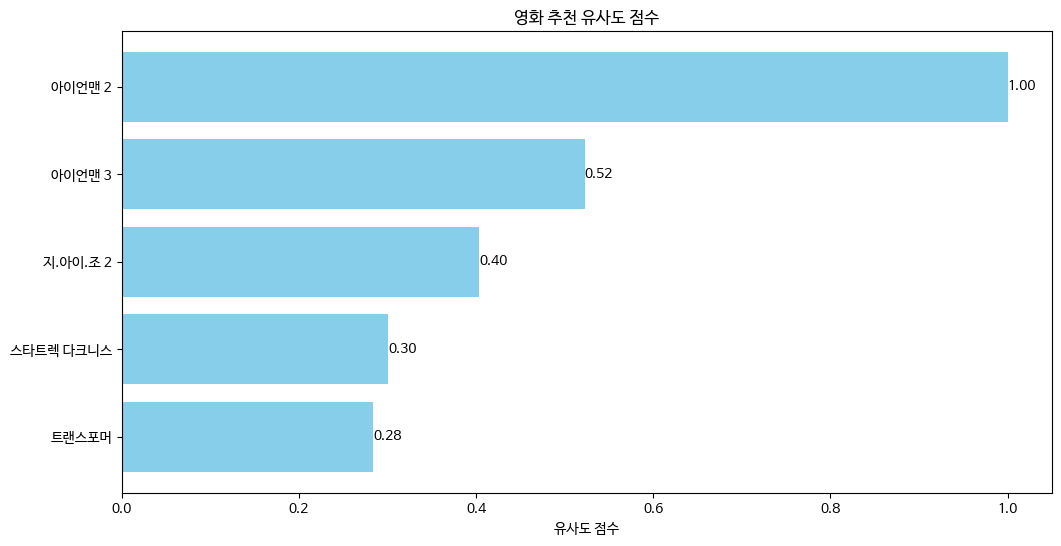

In [1]:
import matplotlib
from matplotlib import font_manager, rc
import platform
import warnings

# 한글 폰트 다운로드 및 설치
!apt-get update -qq
!apt-get install -qq fonts-nanum

# 한글 폰트를 matplotlib에 설정
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path, size=10)
matplotlib.rc('font', family=font.get_name())
matplotlib.rcParams['axes.unicode_minus'] = False

# 경고 무시
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from konlpy.tag import Okt
import matplotlib.pyplot as plt

# 파일 불러오기
file_path = 'movie12.xls'
data = pd.read_excel(file_path, engine='xlrd', header=None)

# column 이름 지정
column_names = [
    "movie_name", "movie_name_English", "year_of_production",
    "country_of_production", "type", "genre", "production_status",
    "director", "production_company"
]

data.columns = column_names

# NLP를 위한 텍스트 특성 결합
data['Text'] = data['movie_name'] + ' ' + data['production_company'] + ' ' + data['genre'] + ' ' + data['director']

# 한국어 텍스트 처리를 위한 Okt 초기화
okt = Okt()

# 텍스트를 토큰화하고 원형으로 복원하는 함수 정의
def tokenize_and_lemmatize(text):
    if isinstance(text, str):
        tokens = okt.morphs(text, stem=True)
        return ' '.join(tokens)
    else:
        return ''

# 텍스트 데이터에 함수 적용
data['Processed_Text'] = data['Text'].apply(tokenize_and_lemmatize)

# 처리된 텍스트 데이터 벡터화
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['Processed_Text'])

# 코사인 유사도 행렬 계산
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_recommendations(movie_title=None, genre=None, country=None, year=None, cosine_sim=cosine_sim):
    if not movie_title and not genre and not country and not year:
        return "영화 제목, 장르, 제작 국가 또는 제작 연도 중 하나를 입력하세요."

    filtered_data = data.copy()

    # 입력된 조건을 모두 만족하는 영화 필터링
    if genre:
        filtered_data = filtered_data[filtered_data['genre'].str.contains(genre, na=False)]
    if country:
        filtered_data = filtered_data[filtered_data['country_of_production'].str.contains(country, na=False)]
    if year:
        filtered_data = filtered_data[filtered_data['year_of_production'].astype(str).str.contains(year, na=False)]

    if movie_title:
        if movie_title not in data['movie_name'].values:
            # 코사인 유사도 계산 없이 가장 유사한 영화 제목 추천
            tfidf_title = tfidf.transform([tokenize_and_lemmatize(movie_title)])
            cosine_sim_title = linear_kernel(tfidf_title, tfidf_matrix)
            sim_scores = list(enumerate(cosine_sim_title[0]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[:5]
            movie_indices = [i[0] for i in sim_scores]
            recommendations = data.iloc[movie_indices]

            # 시각화를 위한 유사도 점수 포함
            similarity_scores = [i[1] for i in sim_scores]
            return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores
        else:
            # 영화 제목에 해당하는 인덱스 가져오기
            idx = data[data['movie_name'] == movie_title].index[0]

            # 필터링된 데이터 내에서 영화 제목과 유사한 영화들을 추천하기 위해 코사인 유사도 계산
            filtered_indices = filtered_data.index
            sim_scores = []
            for filtered_idx in filtered_indices:
                sim_score = cosine_sim[idx, filtered_idx]
                sim_scores.append((filtered_idx, sim_score))

            # 유사도 순으로 정렬
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

            # 상위 5개 추천
            sim_scores = sim_scores[:5]
            movie_indices = [i[0] for i in sim_scores]
            recommendations = data.iloc[movie_indices]

            # 시각화를 위한 유사도 점수 포함
            similarity_scores = [i[1] for i in sim_scores]
            return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores

    else:
        # 필터링된 영화에서 상위 5개 선택
        recommendations = filtered_data.head(5)
        similarity_scores = [1] * len(recommendations)  # 필터링된 결과에서는 유사도 점수를 1로 설정

    recommendations = recommendations.copy()
    recommendations.loc[:, 'year_of_production'] = recommendations['year_of_production'].astype(int)
    return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores

# 사용자 입력을 통한 영화 제목, 장르, 제작 국가, 제작 연도 입력
user_input = input("영화 제목, 장르, 제작 국가, 제작 연도를 쉼표로 구분하여 입력하세요 (예: 제목,장르,국가,연도): ").strip()

# 입력된 값을 쉼표로 구분하여 리스트로 변환
inputs = [i.strip() if i.strip() else None for i in user_input.split(',')]
movie_title, genre, country, year = inputs + [None] * (4 - len(inputs))

recommended_movies, similarity_scores = get_recommendations(movie_title, genre, country, year)
print("추천된 영화들:\n", recommended_movies)
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
# 추천된 영화 목록과 유사도 점수를 시각화
def visualize_recommendations(recommended_movies, similarity_scores):
    # 추천된 영화 목록을 데이터프레임으로 변환
    df = pd.DataFrame(recommended_movies, columns=["영화 제목", "장르", "제작 국가", "제작 연도"])
    df["유사도 점수"] = similarity_scores

    # 바 차트 생성
    plt.figure(figsize=(12, 6))
    plt.barh(df["영화 제목"], df["유사도 점수"], color='skyblue')
    plt.xlabel('유사도 점수')
    plt.title('영화 추천 유사도 점수')
    plt.gca().invert_yaxis()  # 영화 제목이 위에서 아래로 표시되도록 순서 뒤집기
    for i, (title, score) in enumerate(zip(df["영화 제목"], df["유사도 점수"])):
        plt.text(score, i, f'{score:.2f}', va='center')
    plt.show()

visualize_recommendations(recommended_movies, similarity_scores)


In [11]:
import matplotlib
from matplotlib import font_manager, rc
import platform
import warnings

# 한글 폰트 다운로드 및 설치
!apt-get update -qq
!apt-get install -qq fonts-nanum

# 한글 폰트를 matplotlib에 설정
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path, size=10)
matplotlib.rc('font', family=font.get_name())
matplotlib.rcParams['axes.unicode_minus'] = False

# 경고 무시
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from konlpy.tag import Okt
import matplotlib.pyplot as plt

# 파일 불러오기
file_path = 'movie12.xls'
data = pd.read_excel(file_path, engine='xlrd', header=None)

# column 이름 지정
column_names = [
    "movie_name", "movie_name_English", "year_of_production",
    "country_of_production", "type", "genre", "production_status",
    "director", "production_company"
]

data.columns = column_names

# NLP를 위한 텍스트 특성 결합
data['Text'] = data['movie_name'] + ' ' + data['production_company'] + ' ' + data['genre'] + ' ' + data['director']

# 한국어 텍스트 처리를 위한 Okt 초기화
okt = Okt()

# 텍스트를 토큰화하고 원형으로 복원하는 함수 정의
def tokenize_and_lemmatize(text):
    if isinstance(text, str):
        tokens = okt.morphs(text, stem=True)
        return ' '.join(tokens)
    else:
        return ''

# 텍스트 데이터에 함수 적용
data['Processed_Text'] = data['Text'].apply(tokenize_and_lemmatize)

# 처리된 텍스트 데이터 벡터화
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['Processed_Text'])

# 코사인 유사도 행렬 계산
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_recommendations(movie_title=None, genre=None, country=None, year=None, cosine_sim=cosine_sim):
    if not movie_title and not genre and not country and not year:
        return "영화 제목, 장르, 제작 국가 또는 제작 연도 중 하나를 입력하세요."

    filtered_data = data.copy()

    # 입력된 조건을 모두 만족하는 영화 필터링
    if genre:
        filtered_data = filtered_data[filtered_data['genre'].str.contains(genre, na=False)]
    if country:
        filtered_data = filtered_data[filtered_data['country_of_production'].str.contains(country, na=False)]
    if year:
        filtered_data = filtered_data[filtered_data['year_of_production'].astype(str).str.contains(year, na=False)]

    if movie_title:
        if movie_title not in data['movie_name'].values:
            # 코사인 유사도 계산 없이 가장 유사한 영화 제목 추천
            tfidf_title = tfidf.transform([tokenize_and_lemmatize(movie_title)])
            cosine_sim_title = linear_kernel(tfidf_title, tfidf_matrix)
            sim_scores = list(enumerate(cosine_sim_title[0]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[:5]
            movie_indices = [i[0] for i in sim_scores]
            recommendations = data.iloc[movie_indices]

            # 시각화를 위한 유사도 점수 포함
            similarity_scores = [i[1] for i in sim_scores]
            return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores
        else:
            # 영화 제목에 해당하는 인덱스 가져오기
            idx = data[data['movie_name'] == movie_title].index[0]

            # 필터링된 데이터 내에서 영화 제목과 유사한 영화들을 추천하기 위해 코사인 유사도 계산
            filtered_indices = filtered_data.index
            sim_scores = []
            for filtered_idx in filtered_indices:
                if filtered_idx == idx:
                    continue  # 자기 자신은 제외
                sim_score = cosine_sim[idx, filtered_idx]
                sim_scores.append((filtered_idx, sim_score))

            # 유사도 순으로 정렬
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

            # 상위 5개 추천
            sim_scores = sim_scores[:5]
            movie_indices = [i[0] for i in sim_scores]
            recommendations = data.iloc[movie_indices]

            # 시각화를 위한 유사도 점수 포함
            similarity_scores = [i[1] for i in sim_scores]
            return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores

    else:
        # 필터링된 영화에서 상위 5개 선택
        recommendations = filtered_data.head(5)
        similarity_scores = [1] * len(recommendations)  # 필터링된 결과에서는 유사도 점수를 1로 설정

    recommendations = recommendations.copy()
    recommendations.loc[:, 'year_of_production'] = recommendations['year_of_production'].astype(int)
    return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores

# 사용자 입력을 통한 영화 제목, 장르, 제작 국가, 제작 연도 입력
user_input = input("영화 제목, 장르, 제작 국가, 제작 연도를 쉼표로 구분하여 입력하세요 (예: 제목,장르,국가,연도): ").strip()

# 입력된 값을 쉼표로 구분하여 리스트로 변환
inputs = [i.strip() if i.strip() else None for i in user_input.split(',')]
movie_title, genre, country, year = inputs + [None] * (4 - len(inputs))

recommended_movies, similarity_scores = get_recommendations(movie_title, genre, country, year)
print("추천된 영화들:\n", recommended_movies)

# 추천된 영화 목록과 유사도 점수를 시각화
def visualize_recommendations(recommended_movies, similarity_scores):
    # 추천된 영화 목록을 데이터프레임으로 변환
    df = pd.DataFrame(recommended_movies, columns=["영화 제목", "장르", "제작 국가", "제작 연도"])
    df["유사도 점수"] = similarity_scores

    # 바 차트 생성
    plt.figure(figsize=(12, 6))
    plt.barh(df["영화 제목"], df["유사도 점수"], color='skyblue')
    plt.xlabel('유사도 점수')
    plt.title('영화 추천 유사도 점수')
    plt.gca().invert_yaxis()  # 영화 제목이 위에서 아래로 표시되도록 순서 뒤집기
    for i, (title, score) in enumerate(zip(df["영화 제목"], df["유사도 점수"])):
        plt.text(score, i, f'{score:.2f}', va='center')
    plt.show()

visualize_recommendations(recommended_movies, similarity_scores)


KeyboardInterrupt: Interrupted by user

영화 제목, 장르, 제작 국가, 제작 연도를 쉼표로 구분하여 입력하세요 (예: 제목,장르,국가,연도): 인사이드 아웃 2,애니,한국.
추천된 영화들:
 [['코알라 키드 : 영웅의 탄생', '애니메이션', '한국,미국', 2011.0], ['레이디버그', '애니메이션,액션,어드벤처', '한국,프랑스,일본', 2016.0], ['다이노 타임', '애니메이션,어드벤처,코미디', '한국,미국', 2012.0], ['넛잡 2', '애니메이션,어드벤처,코미디,가족', '한국,캐나다,중국', 2017.0], ['넛잡: 땅콩 도둑들', '애니메이션,어드벤처,코미디,가족', '한국,캐나다,미국', 2013.0]]


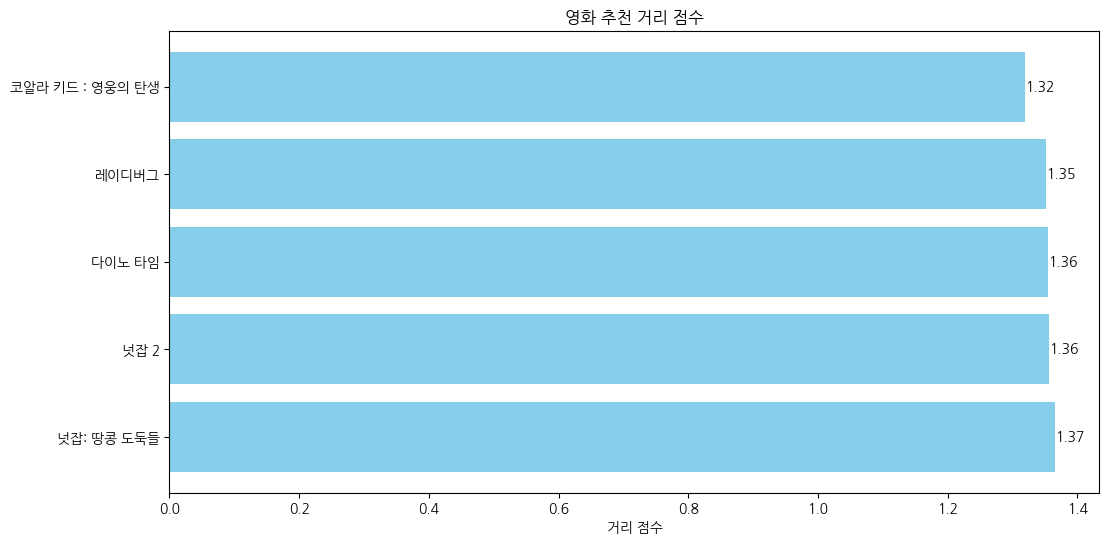

In [10]:
import matplotlib
from matplotlib import font_manager, rc
import platform
import warnings

# 한글 폰트 다운로드 및 설치
!apt-get update -qq
!apt-get install -qq fonts-nanum

# 한글 폰트를 matplotlib에 설정
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path, size=10)
matplotlib.rc('font', family=font.get_name())
matplotlib.rcParams['axes.unicode_minus'] = False

# 경고 무시
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from konlpy.tag import Okt
import matplotlib.pyplot as plt

# 파일 불러오기
file_path = 'movie12.xls'
data = pd.read_excel(file_path, engine='xlrd', header=None)

# column 이름 지정
column_names = [
    "movie_name", "movie_name_English", "year_of_production",
    "country_of_production", "type", "genre", "production_status",
    "director", "production_company"
]

data.columns = column_names

# NLP를 위한 텍스트 특성 결합
data['Text'] = data['movie_name'] + ' ' + data['production_company'] + ' ' + data['genre'] + ' ' + data['director']

# 한국어 텍스트 처리를 위한 Okt 초기화
okt = Okt()

# 텍스트를 토큰화하고 원형으로 복원하는 함수 정의
def tokenize_and_lemmatize(text):
    if isinstance(text, str):
        tokens = okt.morphs(text, stem=True)
        return ' '.join(tokens)
    else:
        return ''

# 텍스트 데이터에 함수 적용
data['Processed_Text'] = data['Text'].apply(tokenize_and_lemmatize)

# 처리된 텍스트 데이터 벡터화
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['Processed_Text'])

# 유클리드 거리 행렬 계산
euclidean_dist = euclidean_distances(tfidf_matrix, tfidf_matrix)

def get_recommendations(movie_title=None, genre=None, country=None, year=None, euclidean_dist=euclidean_dist):
    if not movie_title and not genre and not country and not year:
        return "영화 제목, 장르, 제작 국가 또는 제작 연도 중 하나를 입력하세요."

    filtered_data = data.copy()

    # 입력된 조건을 모두 만족하는 영화 필터링
    if genre:
        filtered_data = filtered_data[filtered_data['genre'].str.contains(genre, na=False)]
    if country:
        filtered_data = filtered_data[filtered_data['country_of_production'].str.contains(country, na=False)]
    if year:
        filtered_data = filtered_data[filtered_data['year_of_production'].astype(str).str.contains(year, na=False)]

    if movie_title:
        if movie_title not in data['movie_name'].values:
            # 유클리드 거리 계산 없이 가장 유사한 영화 제목 추천
            tfidf_title = tfidf.transform([tokenize_and_lemmatize(movie_title)])
            euclidean_dist_title = euclidean_distances(tfidf_title, tfidf_matrix)
            dist_scores = list(enumerate(euclidean_dist_title[0]))
            dist_scores = sorted(dist_scores, key=lambda x: x[1])
            dist_scores = dist_scores[:5]
            movie_indices = [i[0] for i in dist_scores]
            recommendations = data.iloc[movie_indices]

            # 시각화를 위한 거리 점수 포함
            distance_scores = [i[1] for i in dist_scores]
            return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), distance_scores
        else:
            # 영화 제목에 해당하는 인덱스 가져오기
            idx = data[data['movie_name'] == movie_title].index[0]

            # 필터링된 데이터 내에서 영화 제목과 유사한 영화들을 추천하기 위해 유클리드 거리 계산
            filtered_indices = filtered_data.index
            dist_scores = []
            for filtered_idx in filtered_indices:
                if filtered_idx == idx:
                    continue  # 자기 자신은 제외
                dist_score = euclidean_dist[idx, filtered_idx]
                dist_scores.append((filtered_idx, dist_score))

            # 거리 순으로 정렬
            dist_scores = sorted(dist_scores, key=lambda x: x[1])

            # 상위 5개 추천
            dist_scores = dist_scores[:5]
            movie_indices = [i[0] for i in dist_scores]
            recommendations = data.iloc[movie_indices]

            # 시각화를 위한 거리 점수 포함
            distance_scores = [i[1] for i in dist_scores]
            return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), distance_scores

    else:
        # 필터링된 영화에서 상위 5개 선택
        recommendations = filtered_data.head(5)
        distance_scores = [0] * len(recommendations)  # 필터링된 결과에서는 거리 점수를 0으로 설정

    recommendations = recommendations.copy()
    recommendations.loc[:, 'year_of_production'] = recommendations['year_of_production'].astype(int)
    return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), distance_scores

# 사용자 입력을 통한 영화 제목, 장르, 제작 국가, 제작 연도 입력
user_input = input("영화 제목, 장르, 제작 국가, 제작 연도를 쉼표로 구분하여 입력하세요 (예: 제목,장르,국가,연도): ").strip()

# 입력된 값을 쉼표로 구분하여 리스트로 변환
inputs = [i.strip() if i.strip() else None for i in user_input.split(',')]
movie_title, genre, country, year = inputs + [None] * (4 - len(inputs))

recommended_movies, distance_scores = get_recommendations(movie_title, genre, country, year)
print("추천된 영화들:\n", recommended_movies)

# 추천된 영화 목록과 거리 점수를 시각화
def visualize_recommendations(recommended_movies, distance_scores):
    # 추천된 영화 목록을 데이터프레임으로 변환
    df = pd.DataFrame(recommended_movies, columns=["영화 제목", "장르", "제작 국가", "제작 연도"])
    df["거리 점수"] = distance_scores

    # 바 차트 생성
    plt.figure(figsize=(12, 6))
    plt.barh(df["영화 제목"], df["거리 점수"], color='skyblue')
    plt.xlabel('거리 점수')
    plt.title('영화 추천 거리 점수')
    plt.gca().invert_yaxis()  # 영화 제목이 위에서 아래로 표시되도록 순서 뒤집기
    for i, (title, score) in enumerate(zip(df["영화 제목"], df["거리 점수"])):
        plt.text(score, i, f'{score:.2f}', va='center')
    plt.show()

visualize_recommendations(recommended_movies, distance_scores)


In [ ]:
#현재 모델에서는 코사인유사도가 더 나은 모습이다
#이유 : 다른추가적인 국가,장르,연도를 넣었을때는 비슷한 결과가 나왔으나.  제목만 쳤을 경우 코사인유사도를 사용했을경우 좀더 비슷한 결과가 나왔다.
#현재 모델은 국가,장르,연도를 적을시 그것이포함된 영화내에서만 유사도를따졋는데 이보다는 가중치를 주는 쪽이 좋은 것 같다

영화 제목, 장르, 제작 국가, 제작 연도를 쉼표로 구분하여 입력하세요 (예: 제목,장르,국가,연도): 인사이드 아웃2,애니,,
장르 가중치 (기본값 1.0): 1.0
국가 가중치 (기본값 1.0): 1.0
연도 가중치 (기본값 1.0): 1.0
추천된 영화들:
 [['인사이드 아웃 2', '애니메이션', '미국', 2024.0], ['하이큐!! 콘셉트의 싸움', '애니메이션', '일본', 2017.0], ['하이큐!! 땅 VS 하늘', '애니메이션', '일본', 2019.0], ['하이큐!! 재능과 센스', '애니메이션', '일본', 2017.0], ['기동전사 건담 시드 프리덤', '애니메이션', '일본', 2024.0]]


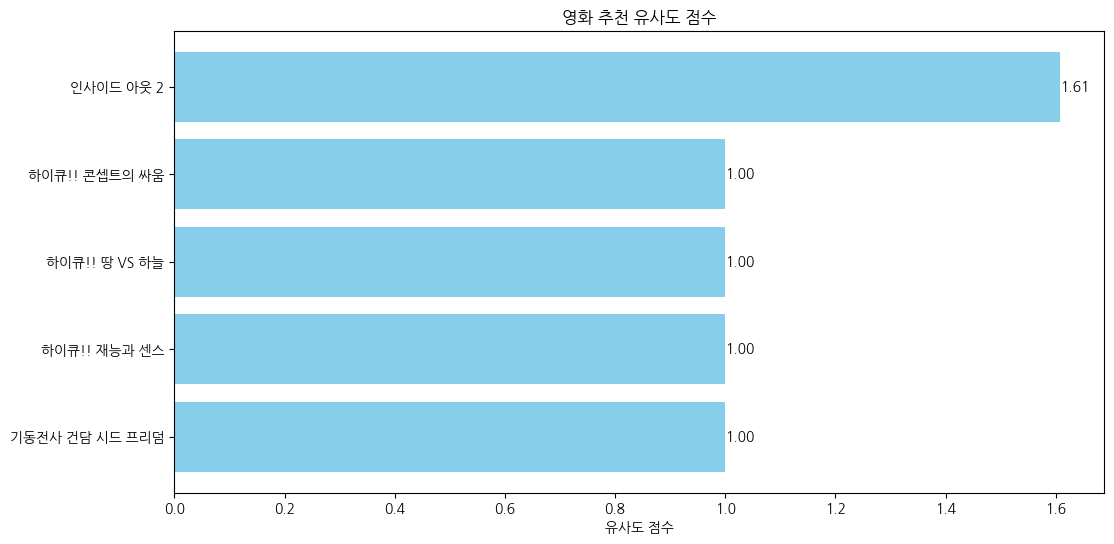

In [13]:
import matplotlib
from matplotlib import font_manager, rc
import platform
import warnings

# 한글 폰트 다운로드 및 설치
!apt-get update -qq
!apt-get install -qq fonts-nanum

# 한글 폰트를 matplotlib에 설정
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path, size=10)
matplotlib.rc('font', family=font.get_name())
matplotlib.rcParams['axes.unicode_minus'] = False

# 경고 무시
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from konlpy.tag import Okt
import matplotlib.pyplot as plt

# 파일 불러오기
file_path = 'movie12.xls'
data = pd.read_excel(file_path, engine='xlrd', header=None)

# column 이름 지정
column_names = [
    "movie_name", "movie_name_English", "year_of_production",
    "country_of_production", "type", "genre", "production_status",
    "director", "production_company"
]

data.columns = column_names

# NLP를 위한 텍스트 특성 결합
data['Text'] = data['movie_name'] + ' ' + data['production_company'] + ' ' + data['genre'] + ' ' + data['director']

# 한국어 텍스트 처리를 위한 Okt 초기화
okt = Okt()

# 텍스트를 토큰화하고 원형으로 복원하는 함수 정의
def tokenize_and_lemmatize(text):
    if isinstance(text, str):
        tokens = okt.morphs(text, stem=True)
        return ' '.join(tokens)
    else:
        return ''

# 텍스트 데이터에 함수 적용
data['Processed_Text'] = data['Text'].apply(tokenize_and_lemmatize)

# 처리된 텍스트 데이터 벡터화
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['Processed_Text'])

# 코사인 유사도 행렬 계산
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_recommendations(movie_title=None, genre=None, country=None, year=None, genre_weight=1.0, country_weight=1.0, year_weight=1.0, cosine_sim=cosine_sim):
    if not movie_title and not genre and not country and not year:
        return "영화 제목, 장르, 제작 국가 또는 제작 연도 중 하나를 입력하세요."

    filtered_data = data.copy()

    if movie_title:
        if movie_title not in data['movie_name'].values:
            # 코사인 유사도 계산 없이 가장 유사한 영화 제목 추천
            tfidf_title = tfidf.transform([tokenize_and_lemmatize(movie_title)])
            cosine_sim_title = linear_kernel(tfidf_title, tfidf_matrix)
            sim_scores = list(enumerate(cosine_sim_title[0]))

            # 가중치 적용
            for i, (idx, score) in enumerate(sim_scores):
                genre_score = genre_weight if genre and genre in data.loc[idx, 'genre'] else 0
                country_score = country_weight if country and country in data.loc[idx, 'country_of_production'] else 0
                year_score = year_weight if year and year in str(data.loc[idx, 'year_of_production']) else 0
                sim_scores[i] = (idx, score + genre_score + country_score + year_score)

            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[:5]
            movie_indices = [i[0] for i in sim_scores]
            recommendations = data.iloc[movie_indices]

            # 시각화를 위한 유사도 점수 포함
            similarity_scores = [i[1] for i in sim_scores]
            return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores
        else:
            # 영화 제목에 해당하는 인덱스 가져오기
            idx = data[data['movie_name'] == movie_title].index[0]

            # 필터링된 데이터 내에서 영화 제목과 유사한 영화들을 추천하기 위해 코사인 유사도 계산
            filtered_indices = filtered_data.index
            sim_scores = []
            for filtered_idx in filtered_indices:
                if filtered_idx == idx:
                    continue  # 자기 자신은 제외
                sim_score = cosine_sim[idx, filtered_idx]

                # 가중치 적용
                genre_score = genre_weight if genre and genre in data.loc[filtered_idx, 'genre'] else 0
                country_score = country_weight if country and country in data.loc[filtered_idx, 'country_of_production'] else 0
                year_score = year_weight if year and year in str(data.loc[filtered_idx, 'year_of_production']) else 0
                sim_scores.append((filtered_idx, sim_score + genre_score + country_score + year_score))

            # 유사도 순으로 정렬
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

            # 상위 5개 추천
            sim_scores = sim_scores[:5]
            movie_indices = [i[0] for i in sim_scores]
            recommendations = data.iloc[movie_indices]

            # 시각화를 위한 유사도 점수 포함
            similarity_scores = [i[1] for i in sim_scores]
            return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores

    else:
        # 필터링된 영화에서 상위 5개 선택
        recommendations = filtered_data.head(5)
        similarity_scores = [1] * len(recommendations)  # 필터링된 결과에서는 유사도 점수를 1로 설정

    recommendations = recommendations.copy()
    recommendations.loc[:, 'year_of_production'] = recommendations['year_of_production'].astype(int)
    return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores

# 사용자 입력을 통한 영화 제목, 장르, 제작 국가, 제작 연도 입력
user_input = input("영화 제목, 장르, 제작 국가, 제작 연도를 쉼표로 구분하여 입력하세요 (예: 제목,장르,국가,연도): ").strip()

# 입력된 값을 쉼표로 구분하여 리스트로 변환
inputs = [i.strip() if i.strip() else None for i in user_input.split(',')]
inputs = inputs + [None] * (4 - len(inputs))  # 입력된 값의 개수가 4개가 되도록 보충
movie_title, genre, country, year = inputs

# 사용자로부터 가중치 입력받기
genre_weight = float(input("장르 가중치 (기본값 1.0): ") or 1.0)
country_weight = float(input("국가 가중치 (기본값 1.0): ") or 1.0)
year_weight = float(input("연도 가중치 (기본값 1.0): ") or 1.0)

recommended_movies, similarity_scores = get_recommendations(movie_title, genre, country, year, genre_weight, country_weight, year_weight)
print("추천된 영화들:\n", recommended_movies)

# 추천된 영화 목록과 유사도 점수를 시각화
def visualize_recommendations(recommended_movies, similarity_scores):
    # 추천된 영화 목록을 데이터프레임으로 변환
    df = pd.DataFrame(recommended_movies, columns=["영화 제목", "장르", "제작 국가", "제작 연도"])
    df["유사도 점수"] = similarity_scores

    # 바 차트 생성
    plt.figure(figsize=(12, 6))
    plt.barh(df["영화 제목"], df["유사도 점수"], color='skyblue')
    plt.xlabel('유사도 점수')
    plt.title('영화 추천 유사도 점수')
    plt.gca().invert_yaxis()  # 영화 제목이 위에서 아래로 표시되도록 순서 뒤집기
    for i, (title, score) in enumerate(zip(df["영화 제목"], df["유사도 점수"])):
        plt.text(score, i, f'{score:.2f}', va='center')
    plt.show()

visualize_recommendations(recommended_movies, similarity_scores)


영화 제목, 장르, 제작 국가, 제작 연도를 쉼표로 구분하여 입력하세요 (예: 제목,장르,국가,연도): 아이언맨 2,액션,한국,
추천된 영화들:
 [['인랑', 'SF,액션', '한국', 2018.0], ['설국열차', 'SF,액션', '한국,체코', 2013.0], ['외계+인 1부', '액션,판타지,SF', '한국', 2022.0], ['7광구', 'SF,액션,스릴러', '한국', 2011.0], ['임금님의 사건수첩', '코미디,어드벤처,액션', '한국', 2016.0]]


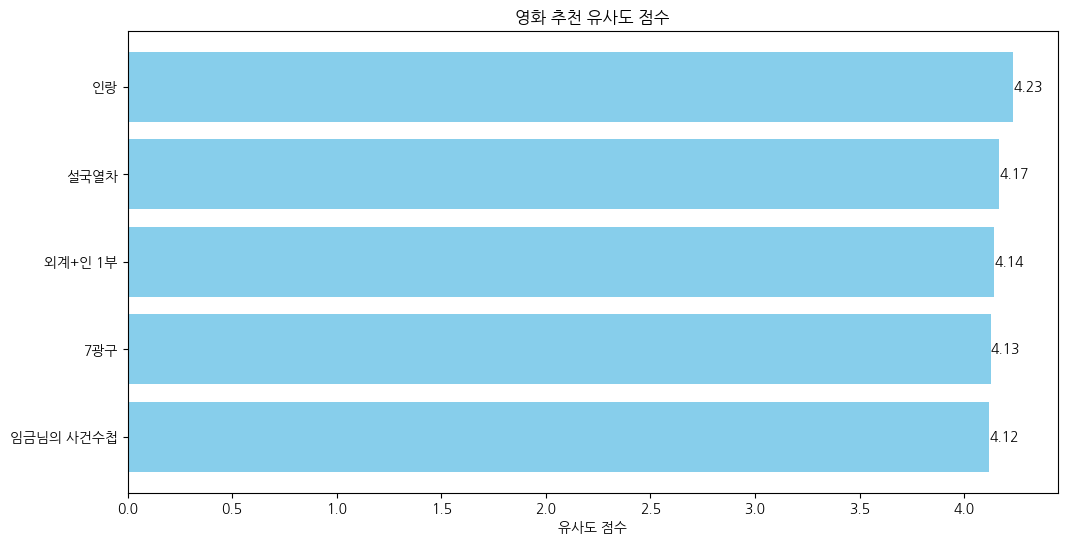

In [15]:
import matplotlib
from matplotlib import font_manager, rc
import platform
import warnings

# 한글 폰트 다운로드 및 설치
!apt-get update -qq
!apt-get install -qq fonts-nanum

# 한글 폰트를 matplotlib에 설정
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path, size=10)
matplotlib.rc('font', family=font.get_name())
matplotlib.rcParams['axes.unicode_minus'] = False

# 경고 무시
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from konlpy.tag import Okt
import matplotlib.pyplot as plt

# 파일 불러오기
file_path = 'movie12.xls'
data = pd.read_excel(file_path, engine='xlrd', header=None)

# column 이름 지정
column_names = [
    "movie_name", "movie_name_English", "year_of_production",
    "country_of_production", "type", "genre", "production_status",
    "director", "production_company"
]

data.columns = column_names

# NLP를 위한 텍스트 특성 결합
data['Text'] = data['movie_name'] + ' ' + data['production_company'] + ' ' + data['genre'] + ' ' + data['director']

# 한국어 텍스트 처리를 위한 Okt 초기화
okt = Okt()

# 텍스트를 토큰화하고 원형으로 복원하는 함수 정의
def tokenize_and_lemmatize(text):
    if isinstance(text, str):
        tokens = okt.morphs(text, stem=True)
        return ' '.join(tokens)
    else:
        return ''

# 텍스트 데이터에 함수 적용
data['Processed_Text'] = data['Text'].apply(tokenize_and_lemmatize)

# 처리된 텍스트 데이터 벡터화
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['Processed_Text'])

# 코사인 유사도 행렬 계산
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_recommendations(movie_title=None, genre=None, country=None, year=None, cosine_sim=cosine_sim):
    if not movie_title and not genre and not country and not year:
        return "영화 제목, 장르, 제작 국가 또는 제작 연도 중 하나를 입력하세요."

    filtered_data = data.copy()

    weights = {'genre_weight': 1.0, 'country_weight': 1.0, 'year_weight': 1.0}
    entered_criteria = 0

    # 입력된 조건에 대해 높은 가중치 부여
    if genre:
        weights['genre_weight'] = 2.0
        entered_criteria += 1
    if country:
        weights['country_weight'] = 2.0
        entered_criteria += 1
    if year:
        weights['year_weight'] = 2.0
        entered_criteria += 1

    # 입력되지 않은 조건에 대해 기본 가중치 부여
    if entered_criteria > 0:
        equal_weight = 1.0 / entered_criteria
    else:
        equal_weight = 1.0

    for key in weights.keys():
        if weights[key] == 1.0:
            weights[key] = equal_weight

    if movie_title:
        if movie_title not in data['movie_name'].values:
            # 코사인 유사도 계산 없이 가장 유사한 영화 제목 추천
            tfidf_title = tfidf.transform([tokenize_and_lemmatize(movie_title)])
            cosine_sim_title = linear_kernel(tfidf_title, tfidf_matrix)
            sim_scores = list(enumerate(cosine_sim_title[0]))

            # 가중치 적용
            for i, (idx, score) in enumerate(sim_scores):
                genre_score = weights['genre_weight'] if genre and genre in data.loc[idx, 'genre'] else 0
                country_score = weights['country_weight'] if country and country in data.loc[idx, 'country_of_production'] else 0
                year_score = weights['year_weight'] if year and year in str(data.loc[idx, 'year_of_production']) else 0
                sim_scores[i] = (idx, score + genre_score + country_score + year_score)

            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[:5]
            movie_indices = [i[0] for i in sim_scores]
            recommendations = data.iloc[movie_indices]

            # 시각화를 위한 유사도 점수 포함
            similarity_scores = [i[1] for i in sim_scores]
            return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores
        else:
            # 영화 제목에 해당하는 인덱스 가져오기
            idx = data[data['movie_name'] == movie_title].index[0]

            # 필터링된 데이터 내에서 영화 제목과 유사한 영화들을 추천하기 위해 코사인 유사도 계산
            filtered_indices = filtered_data.index
            sim_scores = []
            for filtered_idx in filtered_indices:
                if filtered_idx == idx:
                    continue  # 자기 자신은 제외
                sim_score = cosine_sim[idx, filtered_idx]

                # 가중치 적용
                genre_score = weights['genre_weight'] if genre and genre in data.loc[filtered_idx, 'genre'] else 0
                country_score = weights['country_weight'] if country and country in data.loc[filtered_idx, 'country_of_production'] else 0
                year_score = weights['year_weight'] if year and year in str(data.loc[filtered_idx, 'year_of_production']) else 0
                sim_scores.append((filtered_idx, sim_score + genre_score + country_score + year_score))

            # 유사도 순으로 정렬
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

            # 상위 5개 추천
            sim_scores = sim_scores[:5]
            movie_indices = [i[0] for i in sim_scores]
            recommendations = data.iloc[movie_indices]

            # 시각화를 위한 유사도 점수 포함
            similarity_scores = [i[1] for i in sim_scores]
            return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores

    else:
        # 필터링된 영화에서 상위 5개 선택
        recommendations = filtered_data.head(5)
        similarity_scores = [1] * len(recommendations)  # 필터링된 결과에서는 유사도 점수를 1로 설정

    recommendations = recommendations.copy()
    recommendations.loc[:, 'year_of_production'] = recommendations['year_of_production'].astype(int)
    return recommendations[['movie_name', 'genre', 'country_of_production', 'year_of_production']].values.tolist(), similarity_scores

# 사용자 입력을 통한 영화 제목, 장르, 제작 국가, 제작 연도 입력
user_input = input("영화 제목, 장르, 제작 국가, 제작 연도를 쉼표로 구분하여 입력하세요 (예: 제목,장르,국가,연도): ").strip()

# 입력된 값을 쉼표로 구분하여 리스트로 변환
inputs = [i.strip() if i.strip() else None for i in user_input.split(',')]
inputs = inputs + [None] * (4 - len(inputs))  # 입력된 값의 개수가 4개가 되도록 보충
movie_title, genre, country, year = inputs

recommended_movies, similarity_scores = get_recommendations(movie_title, genre, country, year)
print("추천된 영화들:\n", recommended_movies)

# 추천된 영화 목록과 유사도 점수를 시각화
def visualize_recommendations(recommended_movies, similarity_scores):
    # 추천된 영화 목록을 데이터프레임으로 변환
    df = pd.DataFrame(recommended_movies, columns=["영화 제목", "장르", "제작 국가", "제작 연도"])
    df["유사도 점수"] = similarity_scores

    # 바 차트 생성
    plt.figure(figsize=(12, 6))
    plt.barh(df["영화 제목"], df["유사도 점수"], color='skyblue')
    plt.xlabel('유사도 점수')
    plt.title('영화 추천 유사도 점수')
    plt.gca().invert_yaxis()  # 영화 제목이 위에서 아래로 표시되도록 순서 뒤집기
    for i, (title, score) in enumerate(zip(df["영화 제목"], df["유사도 점수"])):
        plt.text(score, i, f'{score:.2f}', va='center')
    plt.show()

visualize_recommendations(recommended_movies, similarity_scores)


In [ ]:
#코딩은 입력한 부분에 가중치를 주고 생략부분에는 가중치(1.0)을줌 이게 기존 방식보다 정확한지는 좀더 비교 필요